In [1]:
load('tiktok.RData')
options(warn = -1)

In [2]:
ls()

[1] "activity"           "e_space"            "e_time"            
 [4] "emotion"            "loss"               "model_construction"
 [7] "model_evaluation"   "object"             "own"               
[10] "p_space"            "p_time"             "pe_space"          
[13] "pe_time"            "search"

In [3]:
suppressWarnings(suppressMessages(library(data.table)))
suppressWarnings(suppressMessages(library(tidyr)))
suppressWarnings(suppressMessages(library(dplyr)))
suppressWarnings(suppressMessages(library(ggplot2)))
suppressWarnings(suppressMessages(library(lubridate)))
suppressWarnings(suppressMessages(library(lfe)))
suppressWarnings(suppressMessages(library(patchwork)))
suppressWarnings(suppressMessages(library(zoo)))
suppressWarnings(suppressMessages(library(forcats)))
suppressWarnings(suppressMessages(library(stargazer)))
suppressWarnings(suppressMessages(library(xgboost)))
suppressWarnings(suppressMessages(library(caret)))
suppressWarnings(suppressMessages(library(sampling)))
suppressWarnings(suppressMessages(library(foreach)))
suppressWarnings(suppressMessages(library(doParallel)))
suppressWarnings(suppressMessages(library(tsbox)))
suppressWarnings(suppressMessages(library(tempdisagg)))

In [4]:
sessionInfo()

R version 4.3.0 (2023-04-21)
Platform: x86_64-apple-darwin20 (64-bit)
Running under: macOS Ventura 13.2.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-x86_64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-x86_64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] tempdisagg_1.1.1  tsbox_0.4.1       doParallel_1.0.17 iterators_1.0.14 
 [5] foreach_1.5.2     sampling_2.10     caret_6.0-94      lattice_0.21-8   
 [9] xgboost_1.7.5.1   stargazer_5.2.3   forcats_1.0.0     zoo_1.8-12       
[13] patchwork_1.1.2   lfe_2.9-0         Matrix_1.5-4      lubridate_1.9.2  
[17] ggplot2_3.4.2     dplyr_1.1.2       tidyr_1.3.0       data.table_1.14.8

loaded v

In [5]:
df = model_evaluation

### Appendix A

#### Figure A.4

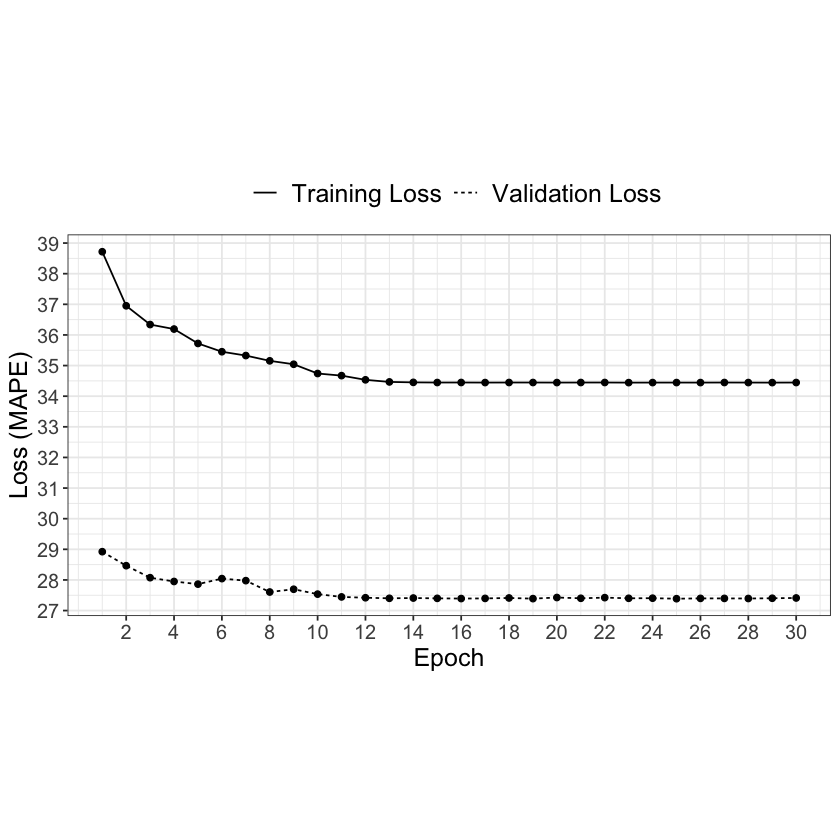

In [6]:
pivot_longer(loss, c('Training Loss', 'Validation Loss')) %>% 
ggplot(aes(epoch, value, linetype = name)) + 
   geom_point() +
   geom_line() +
scale_y_continuous(breaks = seq(0,40,1)) +
scale_x_continuous(breaks = seq(2,30,2)) + 
xlab('Epoch') +
ylab('Loss (MAPE)') +
theme_bw() +
theme(legend.position="top",
        legend.title=element_blank()) +
theme(text = element_text(size=15)) +
theme(legend.text = element_text(size=15)) +
theme(aspect.ratio=2/4)

### Appendix F

#### Figure F.1

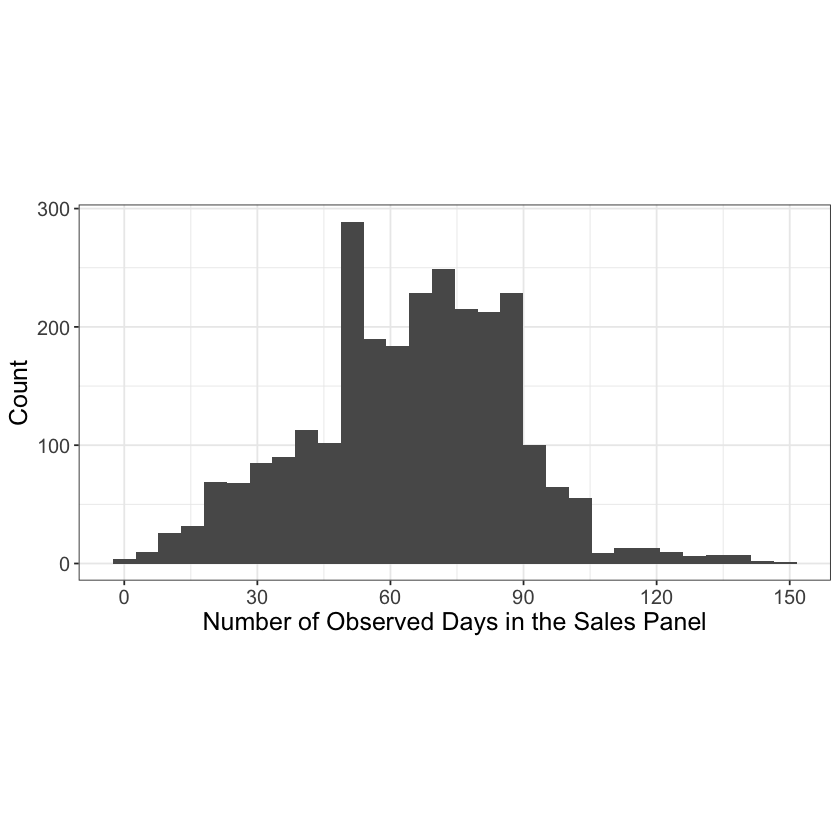

In [7]:
missing = model_evaluation %>% 
group_by(taobao_id) %>%
summarize(duration = as.numeric(max(updated_time) - min(updated_time)+1),
         n = n())

ggplot(aes(n), data = missing) + geom_histogram(bins = 30) + theme_bw() +
theme(text = element_text(size=15))  + xlab('Number of Observed Days in the Sales Panel') + ylab('Count') + 
scale_x_continuous(breaks = seq(0, 150, by = 30)) + 
theme(aspect.ratio=2/4)

#### Figure F.2

In [8]:
df_ss = df %>% 
group_by(video_id) %>% 
mutate(rev_avg = mean(rev)) %>% 
distinct(video_id, .keep_all = T)

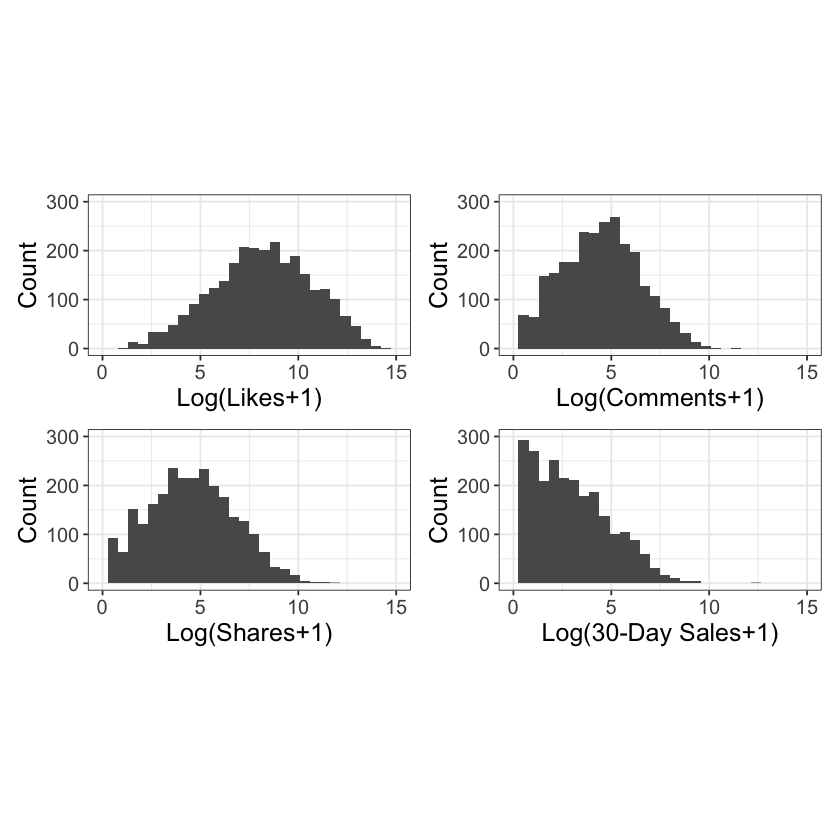

In [9]:
ggplot(aes(log(like+1)), data = df_ss) + geom_histogram(bins = 30) + theme_bw() +
theme(text = element_text(size=15)) + xlim(c(0,15))+ xlab('Log(Likes+1)') + ylab('Count') + ylim(c(0,300)) + theme(aspect.ratio=2/4) +

ggplot(aes(log(comment+1)), data = df_ss) + geom_histogram(bins = 30) + theme_bw() +
theme(text = element_text(size=15)) + xlim(c(0,15)) + xlab('Log(Comments+1)') + ylab('Count') + ylim(c(0,300)) + theme(aspect.ratio=2/4) +

ggplot(aes(log(share+1)), data = df_ss) + geom_histogram(bins = 30) + theme_bw() +
theme(text = element_text(size=15)) + xlim(c(0,15)) + xlab('Log(Shares+1)') + ylab('Count') + ylim(c(0,300)) + theme(aspect.ratio=2/4) +

ggplot(aes(log(rev_avg+1)), data = df_ss) + geom_histogram(bins = 30) + theme_bw() +
theme(text = element_text(size=15)) + xlim(c(0,15)) + xlab('Log(30-Day Sales+1)') + ylab('Count') + ylim(c(0,300)) + theme(aspect.ratio=2/4) +

plot_layout(ncol = 2)

#### Figure F.3

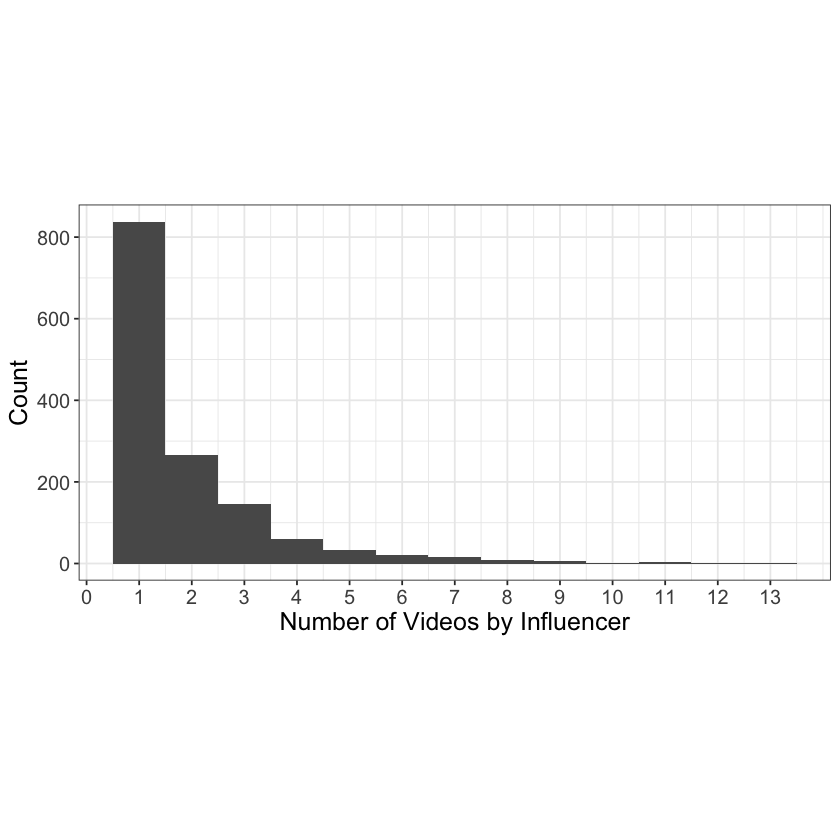

In [10]:
ggplot(aes(n_video), 
                            data = df_ss %>% 
                    group_by(influencer_id) %>% 
                    summarize(n_video = n())) + 
geom_histogram(binwidth = 1) + 
theme_bw() +
theme(text = element_text(size=15)) + 
scale_x_continuous(breaks = seq(0, 13, by = 1)) + 
ylab('Count') +
xlab('Number of Videos by Influencer') +
theme(aspect.ratio=2/4)

#### Figure F.4

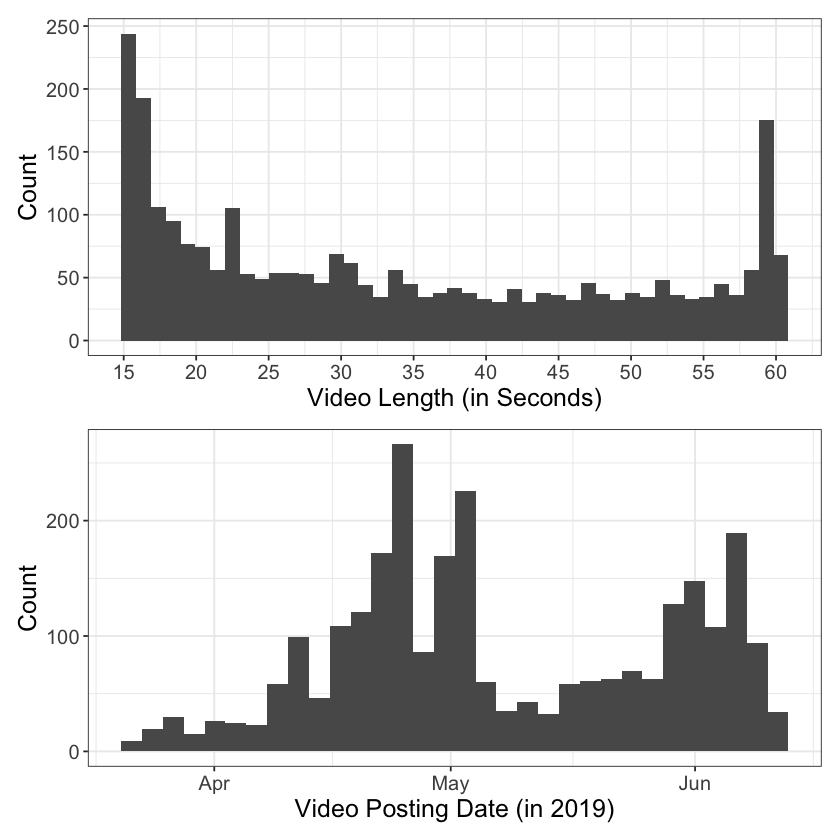

In [11]:
ggplot(aes(len), data = df_ss) + 
geom_histogram(bins = 45) + 
theme_bw() +
theme(text = element_text(size=15)) +
scale_x_continuous(breaks = seq(15, 60, by = 5)) + xlab('Video Length (in Seconds)') + ylab('Count') + 

ggplot(aes(video_posted_time), data = df_ss) + 
geom_histogram(bins = 32) + theme_bw() +
theme(text = element_text(size=15)) + xlab('Video Posting Date (in 2019)') + ylab('Count') +
scale_x_date(date_breaks = "1 month", date_labels = "%b") +

plot_layout(ncol = 1)

#### Figure F.5

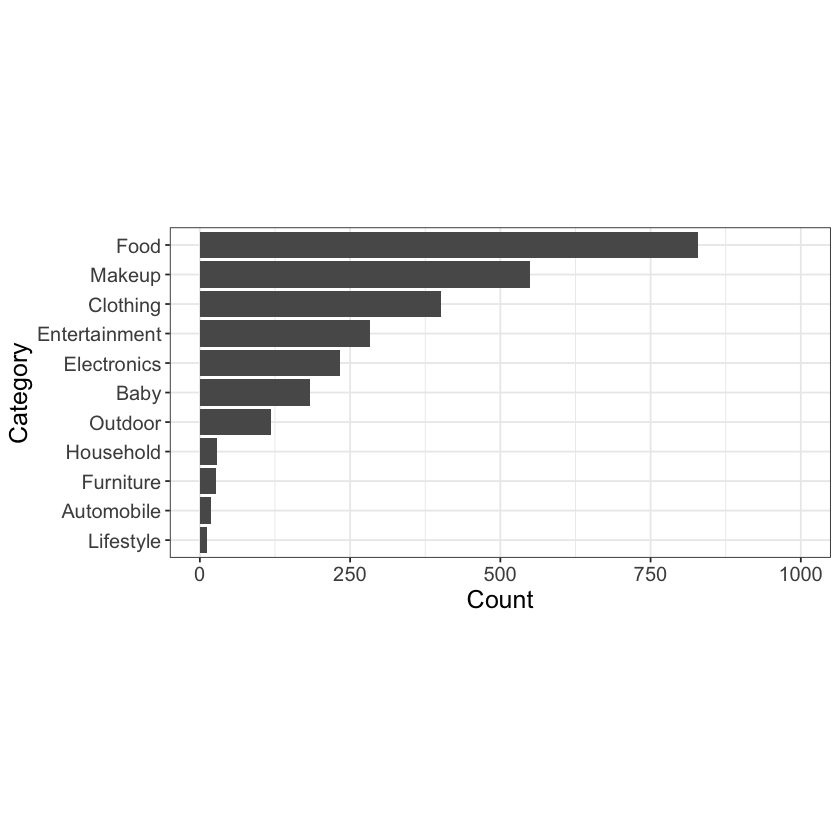

In [12]:
ggplot(aes(fct_rev(fct_infreq(category))), data = df_ss) +  geom_bar() + theme_bw() + 
theme(text = element_text(size=15)) + ylim(c(0,1000)) + xlab('Category') + ylab('Count') + coord_flip() + theme(aspect.ratio=2/4)

#### Figure F.6

In [13]:
# create separate data frames for treated and control products

df = df %>% group_by(taobao_id) %>% 
  mutate(treated_mean = mean(treated))

df %>% distinct(taobao_id, .keep_all = T) %>%
  filter(treated_mean != 1) %>%
  pull(treated_mean) %>% table %>% sum

df_treat = filter(df, treated_mean != 1)
df_control = filter(df, treated_mean == 1)
df_control$treated = 0

treat_id = unique(df_treat$taobao_id)

[1] 259

In [14]:
s = df_treat %>% # compute average revenue before and after the treatment 
  ungroup() %>%
  group_by(taobao_id, treated) %>% 
  mutate(
    avg_rev = mean(rev)
  ) %>%
  distinct(taobao_id, treated, .keep_all = T) %>%
  arrange(taobao_id) %>% 
  ungroup() %>%
  group_by(taobao_id) %>%
  mutate(count = n()) %>%
  filter(count == 2) %>%
  ungroup()

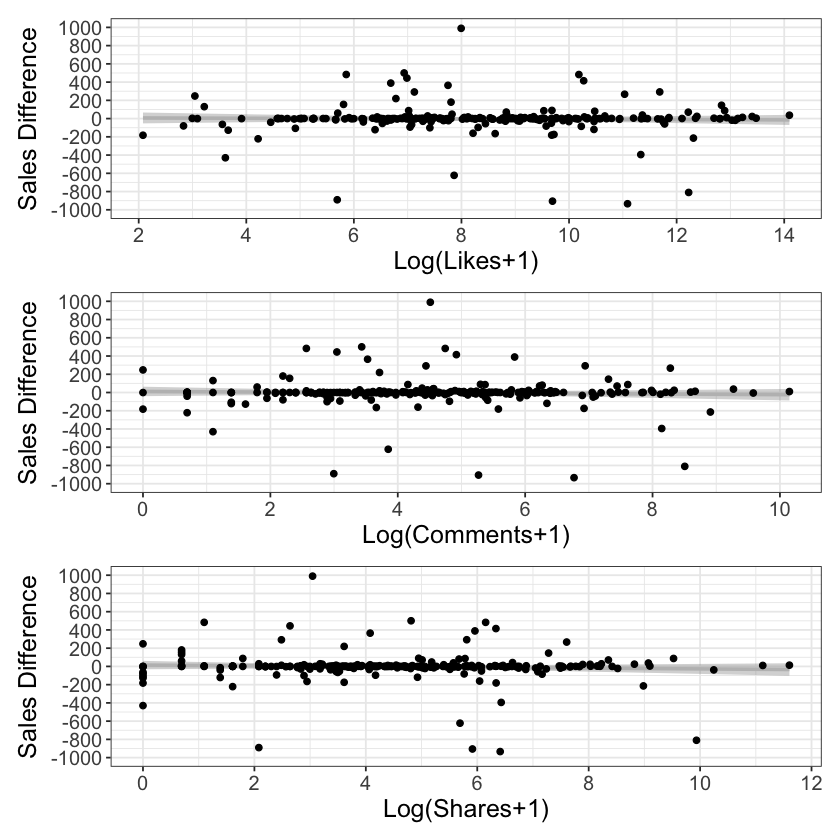

In [15]:
s = df_treat %>% # compute average revenue before and after the treatment 
  ungroup() %>%
  group_by(taobao_id, treated) %>% 
  mutate(
    avg_rev = mean(rev)
  ) %>%
  distinct(taobao_id, treated, .keep_all = T) %>%
  arrange(taobao_id) %>% 
  ungroup() %>%
  group_by(taobao_id) %>%
  mutate(count = n()) %>%
  ungroup()

s = dcast(s, taobao_id ~ treated, value.var = c("avg_rev")) # reshape the data frame so the average revenue before and after the treatment becomes two separate columns

s = left_join(s, df_treat %>% 
                distinct(taobao_id, .keep_all = T) %>%
                select(taobao_id, like, comment, share, pe_score), by ='taobao_id') 

s$rev_diff = s[,3] - s[,2] # compute the difference in average revenue before and after the treatment 

g_like = ggplot(s,
           aes(log(like+1), rev_diff)) +
  geom_smooth(method = 'lm', color = 'grey', formula = y ~ x) +
  geom_point() +
  xlab('Log(Likes+1)') + 
  ylab('Sales Difference') + 
  theme_bw() +
  theme(text = element_text(size=15)) +
  scale_y_continuous(
      limits = c(-1000,1000),
          breaks=seq(-1000, 1000, 200)
  ) +
  scale_x_continuous(
    breaks=seq(0, 15, 2)
  ) 

g_comment = ggplot(s,
           aes(log(comment+1), rev_diff)) +
  geom_smooth(method = 'lm', color = 'grey', formula = y ~ x) +
  geom_point() +
  xlab('Log(Comments+1)') + 
  ylab('Sales Difference') + 
theme_bw() +
  theme(text = element_text(size=15)) +
  scale_y_continuous(
      limits = c(-1000,1000),
          breaks=seq(-1000, 1000, 200)
  ) +
  scale_x_continuous(
    breaks=seq(0, 10, 2)
  ) 

g_share = ggplot(s,
           aes(log(share+1), rev_diff)) +
  geom_smooth(method = 'lm', color = 'grey', formula = y ~ x) +
  geom_point() +
  xlab('Log(Shares+1)') + 
  ylab('Sales Difference') + 
  theme_bw() +
  theme(text = element_text(size=15)) +
  scale_y_continuous(
      limits = c(-1000,1000),
          breaks=seq(-1000, 1000, 200)
  ) +
  scale_x_continuous(
    breaks=seq(0, 12, 2)
  ) 

g_like/g_comment/g_share

In [16]:
cor.test(s$like, s$rev_diff)
cor.test(s$comment, s$rev_diff)
cor.test(s$share, s$rev_diff)


	Pearson's product-moment correlation

data:  s$like and s$rev_diff
t = -0.12059, df = 257, p-value = 0.9041
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1292924  0.1144714
sample estimates:
         cor 
-0.007522289 



	Pearson's product-moment correlation

data:  s$comment and s$rev_diff
t = -0.32743, df = 257, p-value = 0.7436
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1419556  0.1017216
sample estimates:
        cor 
-0.02042023 



	Pearson's product-moment correlation

data:  s$share and s$rev_diff
t = -0.11913, df = 257, p-value = 0.9053
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1292024  0.1145617
sample estimates:
         cor 
-0.007430714 


In [17]:
cor.test(log(s$like+1), s$rev_diff)
cor.test(log(s$comment+1), s$rev_diff)
cor.test(log(s$share+1), s$rev_diff)


	Pearson's product-moment correlation

data:  log(s$like + 1) and s$rev_diff
t = 0.0040483, df = 257, p-value = 0.9968
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1216399  0.1221375
sample estimates:
         cor 
0.0002525287 



	Pearson's product-moment correlation

data:  log(s$comment + 1) and s$rev_diff
t = -0.013098, df = 257, p-value = 0.9896
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1226935  0.1210837
sample estimates:
          cor 
-0.0008170229 



	Pearson's product-moment correlation

data:  log(s$share + 1) and s$rev_diff
t = 0.74905, df = 257, p-value = 0.4545
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.0756455  0.1676087
sample estimates:
       cor 
0.04667353 


In [18]:
summary(lm(rev_diff ~ like, s))
summary(lm(rev_diff ~ comment, s))
summary(lm(rev_diff ~ share, s))


Call:
lm(formula = rev_diff ~ like, data = s)

Residuals:
    Min      1Q  Median      3Q     Max 
-3713.4   -18.8   -12.6    -4.2 14153.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.310e+01  6.402e+01   0.205    0.838
like        -5.539e-05  4.593e-04  -0.121    0.904

Residual standard error: 976.8 on 257 degrees of freedom
Multiple R-squared:  5.658e-05,	Adjusted R-squared:  -0.003834 
F-statistic: 0.01454 on 1 and 257 DF,  p-value: 0.9041



Call:
lm(formula = rev_diff ~ comment, data = s)

Residuals:
    Min      1Q  Median      3Q     Max 
-3710.7   -21.6   -15.4    -5.4 14151.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 16.451519  63.226688   0.260    0.795
comment     -0.009316   0.028452  -0.327    0.744

Residual standard error: 976.7 on 257 degrees of freedom
Multiple R-squared:  0.000417,	Adjusted R-squared:  -0.003472 
F-statistic: 0.1072 on 1 and 257 DF,  p-value: 0.7436



Call:
lm(formula = rev_diff ~ share, data = s)

Residuals:
    Min      1Q  Median      3Q     Max 
-3712.4   -19.0   -11.9    -6.1 14155.0 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) 11.8874134 61.5900648   0.193    0.847
share       -0.0008691  0.0072960  -0.119    0.905

Residual standard error: 976.8 on 257 degrees of freedom
Multiple R-squared:  5.522e-05,	Adjusted R-squared:  -0.003836 
F-statistic: 0.01419 on 1 and 257 DF,  p-value: 0.9053


In [19]:
summary(lm(rev_diff ~ log(like+1), s))
summary(lm(rev_diff ~ log(comment+1), s))
summary(lm(rev_diff ~ log(share+1), s))


Call:
lm(formula = rev_diff ~ log(like + 1), data = s)

Residuals:
    Min      1Q  Median      3Q     Max 
-3711.2   -17.7   -10.6    -6.2 14156.0 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)     9.7750   222.9580   0.044    0.965
log(like + 1)   0.1045    25.8148   0.004    0.997

Residual standard error: 976.9 on 257 degrees of freedom
Multiple R-squared:  6.377e-08,	Adjusted R-squared:  -0.003891 
F-statistic: 1.639e-05 on 1 and 257 DF,  p-value: 0.9968



Call:
lm(formula = rev_diff ~ log(comment + 1), data = s)

Residuals:
    Min      1Q  Median      3Q     Max 
-3710.4   -17.8   -10.9    -5.7 14155.9 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)
(Intercept)       12.4459   150.4044   0.083    0.934
log(comment + 1)  -0.4007    30.5939  -0.013    0.990

Residual standard error: 976.9 on 257 degrees of freedom
Multiple R-squared:  6.675e-07,	Adjusted R-squared:  -0.00389 
F-statistic: 0.0001716 on 1 and 257 DF,  p-value: 0.9896



Call:
lm(formula = rev_diff ~ log(share + 1), data = s)

Residuals:
    Min      1Q  Median      3Q     Max 
-3683.5   -54.5   -10.3    23.2 14123.1 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)
(Intercept)      -79.08     134.25  -0.589    0.556
log(share + 1)    20.05      26.77   0.749    0.455

Residual standard error: 975.8 on 257 degrees of freedom
Multiple R-squared:  0.002178,	Adjusted R-squared:  -0.001704 
F-statistic: 0.5611 on 1 and 257 DF,  p-value: 0.4545


### Appendix H 

#### Table H.1

In [20]:
# create separate data frames for treated and control products

df = df %>% group_by(taobao_id) %>% 
  mutate(treated_mean = mean(treated, na.rm = T))

df %>% distinct(taobao_id, .keep_all = T) %>%
  filter(treated_mean != 1) %>%
  pull(treated_mean) %>% table %>% sum

df_treat = filter(df, treated_mean != 1)
df_control = filter(df, treated_mean == 1)
df_control$treated = 0

treat_id = unique(df_treat$taobao_id)

[1] 259

In [21]:
# impute daily sales
id = unique(df$taobao_id)
rev_day = data.frame()

for (i in id) { # loop over all products 
df_p = select(df, rev, taobao_id, updated_time_rel) %>% filter(taobao_id == i) %>% arrange(updated_time_rel)
df_p$updated_time_rel = as.numeric(df_p$updated_time_rel)

s = full_seq(df_p$updated_time_rel, 1) # fill in missing dates
rev_day_p_c = data.frame(rep(i,length(s)), s)
colnames(rev_day_p_c) = c('taobao_id','updated_time_rel')

df_p = left_join(rev_day_p_c, df_p, by = c("taobao_id", "updated_time_rel"))
df_p = fill(df_p, rev) # imputing revenues on missing days by the previous value

rev_day_p = vector()

for (j in 1:nrow(df_p)) {

  rev_day_p[j] = ifelse( # imputing daily revenue
    df_p$updated_time_rel[j] == 0,
    df_p$rev[1]/30,
    ifelse(df_p$updated_time_rel[j] < 30,
                               df_p$rev[j] - df_p$rev[j-1] + df_p$rev[1]/30,
                               df_p$rev[j] - df_p$rev[j-1] + rev_day_p[j-30]
                               ))
}

df_p$rev_day = rev_day_p

rev_day = rbind(rev_day, df_p)

}

In [22]:
df$updated_time_rel = as.numeric(df$updated_time_rel)

df_day = left_join(rev_day, 
                     select(df, -rev), by = c('taobao_id','updated_time_rel')) %>% drop_na

In [23]:
df_day_treat = filter(df_day, taobao_id %in% treat_id)
df_day_control = filter(df_day, !(taobao_id %in% treat_id))
df_day_control$treated = 0

In [24]:
tau = vector()
gamma = vector()
r2 = vector()
r2_adj = vector()
  
for (i in seq(1,length(treat_id))) { # loop over all treated products
        
    df_day_treat_i = filter(df_day_treat, taobao_id == treat_id[[i]])
    df_day_i = rbind(df_day_treat_i, df_day_control)
    
    model = felm(rev_day ~ 
                   + treated + search                 
                 |as.factor(updated_time) + as.factor(taobao_id)|0|taobao_id + updated_time,
                 df_day_i
    )
    
    tau[i] = as.numeric(coef(summary(model))[1,1])
    gamma[i] = as.numeric(coef(summary(model))[2,1])
    r2[i] = summary(model)$r2
    r2_adj[i] = summary(model)$r2adj
    
  }

In [25]:
d = data.frame(taobao_id = treat_id, tau = tau, gamma = gamma, r2 = r2, r2_adj = r2_adj)

d = left_join(d, 
              df %>% 
              distinct(taobao_id, .keep_all = T) %>% 
              select(taobao_id,
                            pe_score, p_score, e_score, like, comment, share, len,
                               price, discount, avg_search, category,
                               gender,fans,avg_play,influencer_price,expected_cpm,order_cnt, influencer_id, len,
                               pe_score_like, pe_score_comment, pe_score_unsup, e_score_like, e_score_comment, e_score_unsup), by = 'taobao_id')

In [26]:
# normalize the engagement scores
d = d %>% mutate(e_score_like = (e_score_like-min(e_score_like))/(max(e_score_like)-min(e_score_like)),
                e_score_comment = (e_score_comment-min(e_score_comment))/(max(e_score_comment)-min(e_score_comment)),
                e_score_unsup = (e_score_unsup-min(e_score_unsup))/(max(e_score_unsup)-min(e_score_unsup)))

In [27]:
m6_like = felm(tau ~ 0 +
          pe_score_like
             + p_score*e_score_like                   
             + avg_search 
               + price
               + discount
               + fans
               + avg_play
               + influencer_price
               + expected_cpm
               + order_cnt 
               + gender
             | category
                 , d %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m6_comment = felm(tau ~ 
              + pe_score_comment
                + p_score*e_score_comment
             + avg_search 
               + price
               + discount
               + fans
               + avg_play
               + influencer_price
               + expected_cpm
               + order_cnt 
               + gender
             | category
                 , d %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m6_unsup = felm(tau ~ 
          + pe_score_unsup
             + p_score*e_score_unsup
             + avg_search 
               + price
               + discount
               + fans
               + avg_play
               + influencer_price
               + expected_cpm
               + order_cnt 
               + gender
             | category
                 , d %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

vars.order = c("pe_score_like", "pe_score_comment", "pe_score_unsup",
               "e_score", "p_score", "p_score:e_score", 
               "gender", "fans","avg_play","influencer_price","expected_cpm","order_cnt",
               "avg_search", "price", "discount")

stargazer(m6_like, m6_comment, m6_unsup,
          digits = 2,
          type = 'text',
          star.cutoffs = c(.05, .01, .001),
          order=paste0("^", vars.order , "$")
         )


                                     Dependent variable:      
                               -------------------------------
                                             tau              
                                  (1)        (2)        (3)   
--------------------------------------------------------------
pe_score_like                   119.36*                       
                                (53.21)                       
                                                              
pe_score_comment                           164.78*            
                                           (66.83)            
                                                              
pe_score_unsup                                         12.20  
                                                      (30.88) 
                                                              
p_score                          -26.76     29.48      49.92  
                                (57.17)    (59.39)    

#### Table H.2

In [28]:
d$p_times_e_score = d$p_score * d$e_score

In [29]:
d$p_times_e_score_like = d$p_score * d$e_score_like
d$p_times_e_score_comment = d$p_score * d$e_score_comment
d$p_times_e_score_unsup = d$p_score * d$e_score_unsup

In [30]:
set.seed(101)

x <- sparse.model.matrix(tau ~ ., data = select(d, tau, pe_score_like, 
                                                p_score, e_score_like, p_times_e_score_like,
                                                 fans, avg_play, influencer_price, expected_cpm, order_cnt,gender,
                                                    avg_search, price, discount, category,


                                                           ) %>% drop_na)[,-1]

xgb = xgboost(data = as.matrix(x), 
              label = d$tau[!is.na(d$tau)], nround = 2, verbose = 0)

xgb.importance(model = xgb) %>% top_n(10, Gain) %>% stargazer(summary=FALSE, rownames=FALSE, type = 'text')


Feature        Gain  Cover Frequency
------------------------------------
pe_score_like 0.876  0.256   0.318  
discount      0.043  0.188   0.205  
p_score       0.041  0.370   0.205  
fans          0.020  0.139   0.091  
order_cnt     0.013  0.019   0.045  
avg_search    0.006  0.011   0.023  
price         0.001  0.009   0.023  
gender        0.0004 0.002   0.023  
e_score_like  0.0003 0.003   0.023  
expected_cpm  0.0002 0.002   0.023  
------------------------------------


In [31]:
set.seed(101)

x <- sparse.model.matrix(tau ~ ., data = select(d, tau,
                                                                                    pe_score_comment,
                                                                                                            p_score, e_score_comment, p_times_e_score_comment,
                                                 fans, avg_play, influencer_price, expected_cpm, order_cnt,gender,

                                                    avg_search, price, discount, category,


                                                           ) %>% drop_na)[,-1]

xgb = xgboost(data = as.matrix(x), 
              label = d$tau[!is.na(d$tau)], nround = 2, verbose = 0)

xgb.importance(model = xgb) %>% top_n(10, Gain) %>% stargazer(summary=FALSE, rownames=FALSE, type = 'text')


Feature                 Gain  Cover Frequency
---------------------------------------------
pe_score_comment        0.908 0.184   0.364  
p_score                 0.030 0.171   0.152  
e_score_comment         0.017 0.167   0.121  
discount                0.015 0.016   0.091  
order_cnt               0.010 0.153   0.061  
fans                    0.007 0.002   0.030  
avg_search              0.006 0.075   0.030  
p_times_e_score_comment 0.004 0.082   0.061  
categoryClothing        0.003 0.070   0.030  
expected_cpm            0.002 0.076   0.030  
---------------------------------------------


In [32]:
set.seed(101)

x <- sparse.model.matrix(tau ~ ., data = select(d, tau,
                                                                                    pe_score_unsup,
                                                                                                            p_score, e_score_unsup, p_times_e_score_unsup,
                                                 fans, avg_play, influencer_price, expected_cpm, order_cnt,gender,

                                                    avg_search, price, discount, category,


                                                           ) %>% drop_na)[,-1]

xgb = xgboost(data = as.matrix(x), 
              label = d$tau[!is.na(d$tau)], nround = 2, verbose = 0)

xgb.importance(model = xgb) %>% top_n(10, Gain) %>% stargazer(summary=FALSE, rownames=FALSE, type = 'text')


Feature         Gain  Cover Frequency
-------------------------------------
avg_play       0.863  0.208   0.194  
expected_cpm   0.057  0.165   0.161  
p_score        0.028  0.154   0.129  
e_score_unsup  0.026  0.147   0.097  
pe_score_unsup 0.017  0.282   0.194  
fans           0.010  0.002   0.065  
discount       0.0004 0.018   0.065  
avg_search     0.0002 0.017   0.065  
categoryMakeup 0.0001 0.008   0.032  
-------------------------------------


#### Table H.3

##### excluding products with ads 30 days prior from control group

In [33]:
# select control products that had video ads posted more than 30 days ago
df_day_control_30day = df_day_control %>% 
group_by(taobao_id) %>% 
mutate(updated_time_min = min(updated_time),
      diff = updated_time_min - video_posted_time) %>%
filter(diff >= 30) %>% 
select(-diff, -updated_time_min)

In [34]:
n_distinct(df_day_control_30day$taobao_id)

[1] 357

In [35]:
tau_30day = vector()
gamma_30day = vector()
  
for (i in seq(1,length(treat_id))) {
        
    df_day_treat_i = filter(df_day_treat, taobao_id == treat_id[[i]])
    df_day_i = rbind(df_day_treat_i, df_day_control_30day)
    
    model = felm(rev_day ~
                   + treated + search                 
                 |as.factor(updated_time) + as.factor(taobao_id)|0|taobao_id + updated_time,
                 df_day_i
    )
    
    tau_30day[i] = as.numeric(coef(summary(model))[1,1])
    gamma_30day[i] = as.numeric(coef(summary(model))[2,1])
    
  }

In [36]:
t.test(tau_30day)


	One Sample t-test

data:  tau_30day
t = 0.5204, df = 258, p-value = 0.6032
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -4.313204  7.411736
sample estimates:
mean of x 
 1.549266 


In [37]:
d$tau_30day = tau_30day

##### including only not-yet-treated products in control group

In [38]:
date = as.Date('2019-06-01')

df_day_treat_control = df_day_treat %>% # select products not yet treated by 2019/06/01 as controls
filter(video_posted_time >= date) %>%
filter(updated_time < video_posted_time)
df_day_treat_control$treated = 0

df_day_treat_treat = df_day_treat %>% 
filter(video_posted_time < date)

treat_id_treat = unique(df_day_treat_treat$taobao_id)

In [39]:
n_distinct(df_day_treat$taobao_id)

[1] 259

In [40]:
n_distinct(df_day_treat_treat$taobao_id)
n_distinct(df_day_treat_control$taobao_id)

[1] 146

[1] 113

In [41]:
tau_treat = vector()
gamma_treat = vector()
  
  for (i in seq(1,length(treat_id_treat))) {
        
    df_day_treat_i = filter(df_day_treat_treat, taobao_id == treat_id_treat[[i]])
      
    df_day_i = rbind(df_day_treat_i, df_day_treat_control)
    
    model = felm(rev_day ~
                   + treated + search                 
                 |as.factor(updated_time) + as.factor(taobao_id)|0|taobao_id + updated_time,
                 df_day_i
    )
    
    tau_treat[i] = as.numeric(coef(summary(model))[1,1])
    gamma_treat[i] = as.numeric(coef(summary(model))[2,1])
    
  }

In [42]:
t.test(tau_treat)


	One Sample t-test

data:  tau_treat
t = 0.91325, df = 139, p-value = 0.3627
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -13.79222  37.47021
sample estimates:
mean of x 
   11.839 


In [43]:
d2 = data.frame(taobao_id = treat_id_treat, 
               tau_treat)
d = left_join(d, d2, by = 'taobao_id')

##### recode treatment as 1 only on the day of treatment (no carryover)

In [44]:
df_day_treat = mutate(df_day_treat, treated2 = ifelse(updated_time == video_posted_time, 1, 0))
df_day_control$treated2 = 0

In [45]:
tau_no_carryover = vector()
gamma_no_carryover = vector()
  
for (i in seq(1,length(treat_id))) {
        
    df_day_treat_i = filter(df_day_treat, taobao_id == treat_id[[i]])
    df_day_i = rbind(df_day_treat_i, df_day_control)
    
    model = felm(rev_day ~ 
                   + treated2 + search                 
                 |as.factor(updated_time) + as.factor(taobao_id)|0|taobao_id + updated_time,
                 df_day_i
    )
    
    tau_no_carryover[i] = as.numeric(coef(summary(model))[1,1])
    gamma_no_carryover[i] = as.numeric(coef(summary(model))[2,1])
    
  }

In [46]:
t.test(tau_no_carryover)


	One Sample t-test

data:  tau_no_carryover
t = 0.99799, df = 190, p-value = 0.3196
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -51.11474 155.80384
sample estimates:
mean of x 
 52.34455 


In [47]:
d2 = data.frame(taobao_id = treat_id, 
               tau_no_carryover)
d = left_join(d, d2, by = 'taobao_id')

In [48]:
m6_control1 = felm(tau_30day ~ 
               + pe_score 
             + p_score*e_score
             + avg_search 
               + price
               + discount
               + fans
               + avg_play
               + influencer_price
               + expected_cpm
               + order_cnt 
               + gender
             | category
                 , d %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m6_control2 = felm(tau_treat ~ 
               + pe_score 
             + p_score*e_score
             + avg_search 
               + price
               + discount
               + fans
               + avg_play
               + influencer_price
               + expected_cpm
               + order_cnt 
               + gender
             | category
                 , d %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m6_no_carryover = felm(tau_no_carryover ~ 
               + pe_score 
             + p_score*e_score
             + avg_search 
               + price
               + discount
               + fans
               + avg_play
               + influencer_price
               + expected_cpm
               + order_cnt 
               + gender
             | category
                 , d %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

vars.order = c("pe_score", "e_score", "p_score", "p_score:e_score", "gender", "fans","avg_play","influencer_price","expected_cpm","order_cnt", "avg_search", "price", "discount", "Constant")

stargazer(m6_control1, m6_control2, m6_no_carryover,
          digits = 2,
          type = 'text',
          star.cutoffs = c(.05, .01, .001),
          order=paste0("^", vars.order , "$")
         )


                                    Dependent variable:                 
                    ----------------------------------------------------
                       tau_30day         tau_treat     tau_no_carryover 
                          (1)               (2)               (3)       
------------------------------------------------------------------------
pe_score               102.59***         511.25***        1,737.00**    
                        (29.12)          (141.52)          (522.41)     
                                                                        
e_score                  -2.97            148.79            438.64      
                        (32.60)          (157.06)          (567.62)     
                                                                        
p_score                 -109.94           -207.46           -649.23     
                        (81.04)          (390.44)         (1,382.84)    
                                                  

#### Table H.4

In [49]:
set.seed(101)

x <- sparse.model.matrix(tau_30day ~ ., data = select(d, tau_30day,
                                                      pe_score, p_score, e_score, p_times_e_score,
                                                      fans, avg_play, influencer_price, expected_cpm, order_cnt,gender,
                                                      avg_search, price, discount, category,
                                                           ) %>% drop_na)[,-1]

xgb = xgboost(data = as.matrix(x), 
              label = d$tau_30day[!is.na(d$tau_30day)], nround = 2, verbose = 0)

xgb.importance(model = xgb) %>% top_n(10, Gain) %>% stargazer(summary = FALSE, rownames = FALSE, type = 'text')


Feature             Gain  Cover Frequency
-----------------------------------------
pe_score            0.896 0.273   0.344  
p_score             0.037 0.388   0.219  
expected_cpm        0.036 0.091   0.094  
e_score             0.020 0.012   0.188  
discount            0.004 0.084   0.062  
fans                0.004 0.142   0.062  
categoryElectronics 0.003 0.010   0.031  
-----------------------------------------


In [50]:
set.seed(101)

x <- sparse.model.matrix(tau_treat ~ ., data = select(d, tau_treat,
                                                                                    pe_score,
                                                                                                            p_score, e_score,p_times_e_score,
                                                 fans, avg_play, influencer_price, expected_cpm, order_cnt,gender,

                                                    avg_search, price, discount, category,


                                                           ) %>% drop_na)[,-1]

xgb = xgboost(data = as.matrix(x), 
              label = d$tau_treat[!is.na(d$tau_treat)], nround = 2, verbose = 0)

xgb.importance(model = xgb) %>% top_n(10, Gain) %>% stargazer(summary=FALSE, rownames=FALSE, type = 'text')


Feature           Gain  Cover Frequency
---------------------------------------
pe_score         0.991  0.185   0.192  
discount         0.003  0.295   0.269  
p_score          0.002  0.171   0.077  
e_score          0.001  0.063   0.154  
p_times_e_score  0.001  0.069   0.077  
fans             0.001  0.010   0.038  
influencer_price 0.001  0.117   0.115  
avg_play         0.001  0.069   0.038  
price            0.0001 0.020   0.038  
---------------------------------------


In [51]:
set.seed(101)

x <- sparse.model.matrix(tau_no_carryover ~ ., data = select(d, tau_no_carryover,
                                                                                    pe_score,
                                                                                                            p_score, e_score, p_times_e_score,
                                                 fans, avg_play, influencer_price, expected_cpm, order_cnt,gender,

                                                    avg_search, price, discount, category,


                                                           ) %>% drop_na)[,-1]

xgb = xgboost(data = as.matrix(x), 
              label = d$tau_no_carryover[!is.na(d$tau_no_carryover)], nround = 2, verbose = 0)

xgb.importance(model = xgb) %>% top_n(10, Gain) %>% stargazer(summary=FALSE, rownames=FALSE, type = 'text')


Feature           Gain   Cover Frequency
----------------------------------------
pe_score          0.996  0.245   0.282  
order_cnt         0.002  0.089   0.103  
p_score           0.001  0.229   0.103  
discount         0.0004  0.104   0.103  
fans             0.0003  0.009   0.026  
categoryClothing 0.0003  0.168   0.051  
p_times_e_score  0.0002  0.008   0.026  
e_score          0.0001  0.017   0.103  
expected_cpm     0.00003 0.059   0.103  
influencer_price 0.00003 0.059   0.077  
----------------------------------------


#### Table H.5

##### initializing daily sales in proportion to search volume

In [52]:
search$updated_time = as.Date(search$updated_time)
search$taobao_id = as.character(search$taobao_id)

search2 = left_join(search, df %>% 
                   group_by(taobao_id) %>% 
                   arrange(taobao_id, updated_time) %>%
                   mutate(updated_time_min = min(updated_time)) %>%
                   select(taobao_id, updated_time_min) %>% 
                   distinct(taobao_id, .keep_all = T), 
                   by = 'taobao_id')

search2$updated_time_rel = as.numeric(search2$updated_time - search2$updated_time_min)

In [53]:
search3 = search2 %>% # calculate weight 
group_by(taobao_id) %>%
filter(updated_time_rel > -30 & updated_time_rel < 1) 

In [54]:
search3 = left_join(data.frame(taobao_id = rep(unique(search3$taobao_id), each = 30), 
               updated_time_rel = rep(seq(-29,0,1),n_distinct(search3$taobao_id))) %>% 
                    arrange(taobao_id, updated_time_rel), 
                    search3, 
                    by = c('taobao_id', 'updated_time_rel')) %>%
group_by(taobao_id) %>%
mutate(across(search, ~replace_na(., mean(., na.rm=TRUE))))

In [55]:
search3 = search3 %>% # calculate weight 
group_by(taobao_id) %>%
mutate(weight = search/sum(search)) %>% 
mutate(weight = ifelse(is.na(weight), 1/30, weight)) %>%
arrange(taobao_id, updated_time_rel) %>%
select(taobao_id, updated_time_rel, weight)

In [56]:
# impute daily sales
id = unique(df$taobao_id)   
rev_day_alt1 = data.frame()

for (i in id) {
df_p = select(df, rev, taobao_id, updated_time, updated_time_rel) %>% filter(taobao_id == i) %>% arrange(updated_time_rel)
df_p$updated_time_rel = as.numeric(df_p$updated_time_rel)

s = full_seq(df_p$updated_time_rel, 1)
rev_day_p_c = data.frame(rep(i,length(s)), s)
colnames(rev_day_p_c) = c('taobao_id','updated_time_rel')

df_p = left_join(rev_day_p_c, df_p, by = c("taobao_id", "updated_time_rel"))
df_p = fill(df_p, rev)

rev_day_p = vector()

for (j in 1:nrow(df_p)) {

  rev_day_p[j] = 
    
    ifelse(
        
    df_p$taobao_id %in% search3$taobao_id,    
    
    ifelse(

      df_p$updated_time_rel[j] == 0,
      df_p$rev[1] * filter(search3, taobao_id == i, updated_time_rel == 0) %>% pull(weight),
              ifelse(df_p$updated_time_rel[j] < 30,
                               df_p$rev[j] - df_p$rev[j-1] + df_p$rev[1] * filter(search3, taobao_id == i, updated_time_rel == j-30) %>% pull(weight),
                               df_p$rev[j] - df_p$rev[j-1] + rev_day_p[j-30]
                               )



  ),
    
    ifelse(
        df_p$updated_time_rel[j] == 0,
        df_p$rev[1]/30,
        ifelse(df_p$updated_time_rel[j] < 30,
                                   df_p$rev[j] - df_p$rev[j-1] + df_p$rev[1]/30,
                                   df_p$rev[j] - df_p$rev[j-1] + rev_day_p[j-30]
                                   ))
    )
    
    



}

df_p$rev_day = rev_day_p

rev_day_alt1 = rbind(rev_day_alt1, df_p)

}

In [57]:
treat_id = unique(df_treat$taobao_id)

df_day_alt1 = left_join(rev_day_alt1, 
                     select(df, -rev, -updated_time), by = c('taobao_id','updated_time_rel'))

df_day_treat_alt1 = filter(df_day_alt1, taobao_id %in% treat_id) 
df_day_control_alt1 = filter(df_day_alt1, !(taobao_id %in% treat_id)) 
df_day_control_alt1$treated = 0

In [58]:
tau_alt1 = vector()
gamma_alt1 = vector()
  
for (i in seq(1,length(treat_id))) {
        
    df_day_treat_i = filter(df_day_treat_alt1, taobao_id == treat_id[[i]])
    df_day_i = rbind(df_day_treat_i, df_day_control_alt1)
    
    model = felm(rev_day ~
                   + treated + search                 
                 |as.factor(updated_time) + as.factor(taobao_id)|0|taobao_id + updated_time,
                 df_day_i
    )
    
    tau_alt1[i] = as.numeric(coef(summary(model))[1,1])
    gamma_alt1[i] = as.numeric(coef(summary(model))[2,1])
    
  }

In [59]:
t.test(tau_alt1)


	One Sample t-test

data:  tau_alt1
t = 0.67621, df = 258, p-value = 0.4995
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -3.820142  7.815902
sample estimates:
mean of x 
  1.99788 


In [60]:
d2 = data.frame(taobao_id = treat_id, tau_alt1 = tau_alt1)

d = left_join(d, 
              d2, by = 'taobao_id')

##### removing products with unusual search fluctuations

In [61]:
df_first = df %>% group_by(taobao_id) %>% arrange(updated_time) %>% filter(row_number()==1) %>% select(taobao_id, updated_time) %>% rename(enter_time = updated_time)

search2 = left_join(search, df_first, by = 'taobao_id') %>% filter(updated_time < enter_time) %>% group_by(taobao_id) %>% mutate(search_mean = mean(search), search_sd = sd(search)) %>% drop_na
search2 = search2 %>% group_by(taobao_id) %>% mutate(unusual = ifelse(search <= search_mean - 1*search_sd | search >= search_mean + 1*search_sd, 1, 0)) # identify products with unusual search volumes 

unusual = search2 %>% group_by(taobao_id) %>% summarize(unusual = sum(unusual)) %>% filter(unusual > 0) %>% pull(taobao_id)
df3 = df %>% filter(!taobao_id %in% unusual)

In [62]:
# impute daily sales
id = unique(df3$taobao_id)   
rev_day_alt2 = data.frame()

for (i in id) { # loop over all products 
df_p = select(df3, rev, taobao_id, updated_time_rel) %>% filter(taobao_id == i) %>% arrange(updated_time_rel)
df_p$updated_time_rel = as.numeric(df_p$updated_time_rel)

s = full_seq(df_p$updated_time_rel, 1) # fill in missing dates
rev_day_p_c = data.frame(rep(i,length(s)), s)
colnames(rev_day_p_c) = c('taobao_id','updated_time_rel')

df_p = left_join(rev_day_p_c, df_p, by = c("taobao_id", "updated_time_rel"))
df_p = fill(df_p, rev) # imputing revenues on missing days by the previous value

rev_day_p = vector()

for (j in 1:nrow(df_p)) {

  rev_day_p[j] = ifelse( # imputing daily revenue
    df_p$updated_time_rel[j] == 0,
    df_p$rev[1]/30,
    ifelse(df_p$updated_time_rel[j] < 30,
                               df_p$rev[j] - df_p$rev[j-1] + df_p$rev[1]/30,
                               df_p$rev[j] - df_p$rev[j-1] + rev_day_p[j-30]
                               ))
}

df_p$rev_day = rev_day_p

rev_day_alt2 = rbind(rev_day_alt2, df_p)

}

In [63]:
df_day_alt2 = left_join(rev_day_alt2, 
                     select(df3, -rev), by = c('taobao_id','updated_time_rel'))

df_day_treat2 = filter(df_day_alt2, taobao_id %in% unique(filter(df3, treated_mean != 1) %>% pull(taobao_id))) 
df_day_control2 = filter(df_day_alt2, !(taobao_id %in% unique(filter(df3, treated_mean != 1) %>% pull(taobao_id)))) 
df_day_control2$treated = 0
                         
treat_id_alt2 = unique(df_day_treat2$taobao_id)

In [64]:
n_distinct(df_day_treat2$taobao_id)
n_distinct(df_day_control2$taobao_id)

[1] 243

[1] 2214

In [65]:
tau_alt2 = vector()
gamma_alt2 = vector()
  
for (i in seq(1,length(treat_id_alt2))) {
        
    df_day_treat_i = filter(df_day_treat2, taobao_id == treat_id_alt2[[i]])
    df_day_i = rbind(df_day_treat_i, df_day_control2)
    
    model = felm(rev_day ~
                   + treated + search                 
                 |as.factor(updated_time) + as.factor(taobao_id)|0|taobao_id + updated_time,
                 df_day_i
    )
    
    tau_alt2[i] = as.numeric(coef(summary(model))[1,1])
    gamma_alt2[i] = as.numeric(coef(summary(model))[2,1])
    
  }

In [66]:
t.test(tau_alt2)


	One Sample t-test

data:  tau_alt2
t = 0.73835, df = 242, p-value = 0.461
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -3.856404  8.480789
sample estimates:
mean of x 
 2.312192 


In [67]:
d2 = data.frame(taobao_id = treat_id_alt2, tau_alt2 = tau_alt2)

d = left_join(d, 
              d2, by = 'taobao_id')

##### temporal disaggregration (Denton-Cholette method)

In [68]:
# impute daily sales
id = unique(df$taobao_id)
rev_day_alt3 = data.frame()

for (i in id) { # loop over all products 
    
rev_td = df %>% 
    ungroup %>% 
    filter(taobao_id == i) %>% 
    select(rev, updated_time) %>% 
    rename(time = updated_time, value = rev) %>% 
    complete(time = seq.Date(from = floor_date(min(time), 'month'), 
                             to = max(max(time), min(time) + 30), by = "day")) %>% 
    fill(value, .direction = 'up') %>% 
    fill(value, .direction = 'down') %>% 
    filter(time %in% seq(from = min(time), by = 'month', length.out = 12))

tryCatch({
   p = predict(td(rev_td ~ 1, method = "fast", to = "day"))
   p$taobao_id = i
   rev_day_alt3 = rbind(rev_day_alt3, p)
  }, error=function(e){})
}

In [69]:
rev_day_alt3 = rev_day_alt3 %>% rename(updated_time = time, rev_day = value)
df_day_alt3 = left_join(rev_day_alt3, 
                     df, by = c('taobao_id','updated_time')) %>% drop_na # the missing dates from the observed sale panel are dropped

In [70]:
df_day_treat3 = filter(df_day_alt3, taobao_id %in% treat_id)
df_day_control3 = filter(df_day_alt3, !(taobao_id %in% treat_id))
df_day_control3$treated = 0

In [71]:
tau_alt3 = vector()
gamma_alt3 = vector()
  
for (i in seq(1,length(treat_id))) { # loop over all treated products
        
    df_day_treat_i = filter(df_day_treat3, taobao_id == treat_id[[i]])
    df_day_i = rbind(df_day_treat_i, df_day_control3)
    
    model = felm(rev_day ~ 
                    treated + search                 
                 |as.factor(updated_time) + as.factor(taobao_id)|0|taobao_id + updated_time,
                 df_day_i
    )
    
    tau_alt3[i] = as.numeric(coef(summary(model))[1,1])
    gamma_alt3[i] = as.numeric(coef(summary(model))[2,1])    
  }

In [72]:
t.test(tau_alt3)


	One Sample t-test

data:  tau_alt3
t = -0.13197, df = 258, p-value = 0.8951
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -3.621950  3.166985
sample estimates:
 mean of x 
-0.2274827 


In [73]:
d2 = data.frame(taobao_id = treat_id, tau_alt3 = tau_alt3)
d = left_join(d, 
              d2, by = 'taobao_id')

In [74]:
m6_alt1 = felm(tau_alt1 ~ 
               + pe_score 
             + p_score*e_score
             + avg_search 
               + price
               + discount
               + fans
               + avg_play
               + influencer_price
               + expected_cpm
               + order_cnt 
               + gender
              | category
                 , d %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m6_alt2 = felm(tau_alt2 ~ 
               + pe_score 
             + p_score*e_score
             + avg_search 
               + price
               + discount
               + fans
               + avg_play
               + influencer_price
               + expected_cpm
               + order_cnt 
               + gender
              | category
                 , d %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))


m6_alt3 = felm(tau_alt3 ~ 
               + pe_score 
             + p_score*e_score
             + avg_search 
               + price
               + discount
               + fans
               + avg_play
               + influencer_price
               + expected_cpm
               + order_cnt 
               + gender
              | category
                 , d %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

vars.order = c("pe_score", "e_score", "p_score", "p_score:e_score", "gender", "fans","avg_play","influencer_price","expected_cpm","order_cnt", "avg_search", "price", "discount", "Constant")

stargazer(m6_alt1, m6_alt2, m6_alt3,
          digits = 2,
          type = 'text',
          star.cutoffs = c(.05, .01, .001),
          order=paste0("^", vars.order , "$")
         )


                                   Dependent variable:                
                    --------------------------------------------------
                        tau_alt1         tau_alt2         tau_alt3    
                          (1)              (2)              (3)       
----------------------------------------------------------------------
pe_score               100.79***        104.33***         55.08**     
                        (28.92)          (30.01)          (16.77)     
                                                                      
e_score                  -2.46             4.13             3.32      
                        (32.38)          (34.36)          (18.77)     
                                                                      
p_score                 -112.44          -112.65           -80.99     
                        (80.50)          (84.75)          (46.66)     
                                                                      
p_sco

#### Table H.6

In [75]:
set.seed(101)

x <- sparse.model.matrix(tau_alt1 ~ ., data = select(d, tau_alt1,
                                                                                    pe_score,
                                                                                                            p_score, e_score, p_times_e_score,
                                                 fans, avg_play, influencer_price, expected_cpm, order_cnt,gender,

                                                    avg_search, price, discount, category,


                                                           ) %>% drop_na)[,-1]

xgb = xgboost(data = as.matrix(x), 
              label = d$tau_alt1[!is.na(d$tau_alt1)], nround = 2, verbose = 0)

xgb.importance(model = xgb) %>% top_n(10, Gain) %>% stargazer(summary=FALSE, rownames=FALSE, type = 'text')


Feature       Gain  Cover Frequency
-----------------------------------
pe_score     0.865  0.338   0.242  
expected_cpm 0.044  0.075   0.091  
p_score      0.027  0.329   0.152  
e_score      0.025  0.006   0.091  
discount     0.017  0.034   0.212  
fans         0.013  0.070   0.091  
avg_search   0.009  0.143   0.061  
price        0.0002 0.002   0.030  
order_cnt    0.0001 0.003   0.030  
-----------------------------------


In [76]:
set.seed(101)

x <- sparse.model.matrix(tau_alt2 ~ ., data = select(d, tau_alt2,
                                                                                    pe_score,
                                                                                                            p_score, e_score, p_times_e_score,
                                                 fans, avg_play, influencer_price, expected_cpm, order_cnt,gender,

                                                    avg_search, price, discount, category,


                                                           ) %>% drop_na)[,-1]

xgb = xgboost(data = as.matrix(x), 
              label = d$tau_alt2[!is.na(d$tau_alt2)], nround = 2, verbose = 0)

xgb.importance(model = xgb) %>% top_n(10, Gain) %>% stargazer(summary=FALSE, rownames=FALSE, type = 'text')


Feature          Gain  Cover Frequency
--------------------------------------
pe_score         0.888 0.174   0.333  
e_score          0.035 0.009   0.143  
order_cnt        0.028 0.168   0.095  
p_score          0.019 0.248   0.143  
avg_search       0.013 0.163   0.095  
p_times_e_score  0.007 0.158   0.095  
categoryFood     0.006 0.003   0.048  
categoryClothing 0.003 0.078   0.048  
--------------------------------------


In [77]:
set.seed(101)

x <- sparse.model.matrix(tau_alt3 ~ ., data = select(d, tau_alt3,
                                                                                    pe_score,
                                                                                                            p_score, e_score, p_times_e_score,
                                                 fans, avg_play, influencer_price, expected_cpm, order_cnt,gender,

                                                    avg_search, price, discount, category,


                                                           ) %>% drop_na)[,-1]

xgb = xgboost(data = as.matrix(x), 
              label = d$tau_alt3[!is.na(d$tau_alt3)], nround = 2, verbose = 0)

xgb.importance(model = xgb) %>% top_n(10, Gain) %>% stargazer(summary=FALSE, rownames=FALSE, type = 'text')


Feature          Gain  Cover Frequency
--------------------------------------
pe_score         0.590 0.247   0.379  
p_score          0.287 0.175   0.138  
order_cnt        0.052 0.168   0.069  
fans             0.037 0.008   0.069  
expected_cpm     0.012 0.009   0.034  
avg_search       0.011 0.294   0.138  
discount         0.006 0.009   0.069  
categoryClothing 0.002 0.078   0.034  
p_times_e_score  0.002 0.008   0.034  
e_score          0.001 0.004   0.034  
--------------------------------------


#### Figure H.1, H.2, H.3

In [78]:
# parallel
cores = detectCores() 
cl = makeCluster(cores[1]-1)
registerDoParallel(cl) 
cl

socket cluster with 47 nodes on host ‘localhost’

In [79]:
# bootstrap
tau_bs <- foreach(b = 1:1000, .combine=cbind) %dopar% {
    
set.seed(b)

tau = vector()

clu = sampling::cluster(df_day_control, 
                        clustername=c("taobao_id"), 
                        size=dplyr::n_distinct(df_day_control$taobao_id), 
                        method="srswr")
df_day_control_bs = sampling::getdata(df_day_control, clu)
df_day_control_bs = dplyr::select(df_day_control_bs, -ID_unit, -Replicates, -Prob)


for (i in seq(1,length(treat_id))) { # loop over all treated products
        
    df_day_treat_i = dplyr::filter(df_day_treat, taobao_id == treat_id[[i]])
    df_day_i = rbind(df_day_treat_i, df_day_control_bs)
    
    model = lfe::felm(rev_day ~ 
                    treated + search                 
                 |as.factor(updated_time) + as.factor(taobao_id)|0|taobao_id + updated_time,
                 df_day_i
    )
    
    tau[i] = as.numeric(coef(summary(model))[1,1])
    
  }

tau

}

head(tau_bs)

stopCluster(cl)

result.1,result.2,result.3,result.4,result.5,result.6,result.7,result.8,result.9,result.10,⋯,result.991,result.992,result.993,result.994,result.995,result.996,result.997,result.998,result.999,result.1000
11.779010,9.558280,10.100814,9.570054,-0.1615369,3.247458,10.030992,9.721507,2.448288,4.237728,⋯,12.320143,1.2072259,2.554885,8.979268,3.152039,3.789526,9.524263,11.002537,9.050883,9.955400
-62.016052,-63.983368,-61.484726,-64.150395,-55.4174757,-53.634909,-63.591939,-62.640952,-55.340261,-51.857500,⋯,-60.858534,-54.6410876,-53.973256,-62.955171,-52.457637,-53.770981,-62.673336,-62.866846,-63.721094,-62.691994
2.748389,-4.600229,-3.469789,-3.996791,-5.7114332,-1.708633,-3.951834,-3.936975,-2.640056,3.353046,⋯,2.565188,0.3685344,1.587528,-5.665766,-2.043582,3.591709,-3.867172,-2.521558,-5.164604,-4.142559
22.057721,18.540582,20.299764,20.159303,24.2886116,23.737662,21.222757,20.152757,22.961035,28.458864,⋯,21.399405,23.3998336,23.259797,18.144468,27.940206,27.407731,18.290753,18.957130,20.432802,21.723052
8.894988,7.332224,7.523182,7.860402,0.6415112,2.983253,8.119433,7.860571,2.203598,3.241157,⋯,9.342790,1.5732656,2.362109,6.751878,2.477662,2.974547,7.649286,8.455689,6.852740,7.896659
30.550919,29.200885,29.570368,30.358269,22.2823404,24.076304,30.151184,30.719775,23.483152,24.888337,⋯,31.220812,22.6698540,23.320154,29.285384,23.797039,23.616741,30.099795,30.158128,29.113161,29.864357


In [80]:
beta_bs = vector()
p_bs = vector()
gain_bs = vector()

for (i in 1:1000){

d_bs = data.frame(taobao_id = treat_id, tau = tau_bs[,i])
d_bs = left_join(d_bs, 
              df %>% 
              distinct(taobao_id, .keep_all = T) %>% 
              select(taobao_id,
                            pe_score, p_score, e_score, like, comment, share,
                               price, discount, avg_search, category,
                               gender,fans,avg_play,influencer_price,expected_cpm,order_cnt, influencer_id,
                    pe_score_like, pe_score_comment, pe_score_unsup), 
                 by = 'taobao_id')
    
d_bs$p_times_e_score = d_bs$p_score * d_bs$e_score
    
m6 = felm(tau ~ 
               + pe_score 
             + p_score*e_score
             + avg_search 
               + price
               + discount
               + fans
               + avg_play
               + influencer_price
               + expected_cpm
               + order_cnt 
               + gender
             | category
                 , d_bs %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

beta_bs[i] = as.numeric(coef(summary(m6))[1,1])
p_bs[i] = as.numeric(coef(summary(m6))[1,4])
    
x <- sparse.model.matrix(tau ~ ., data = select(d_bs, tau,
                                                                                    pe_score,
                                                                                                            p_score, e_score,
                                                p_times_e_score,
                                                 fans, avg_play, influencer_price, expected_cpm, order_cnt,gender,

                                                    avg_search, price, discount, category,


                                                           ) %>% drop_na)[,-1]

xgb = xgboost(data = as.matrix(x), 
              label = d_bs$tau, nround = 2, verbose = 0)

gain_bs[i] = as.numeric(xgb.importance(model = xgb)[Feature == 'pe_score',2]) 

}

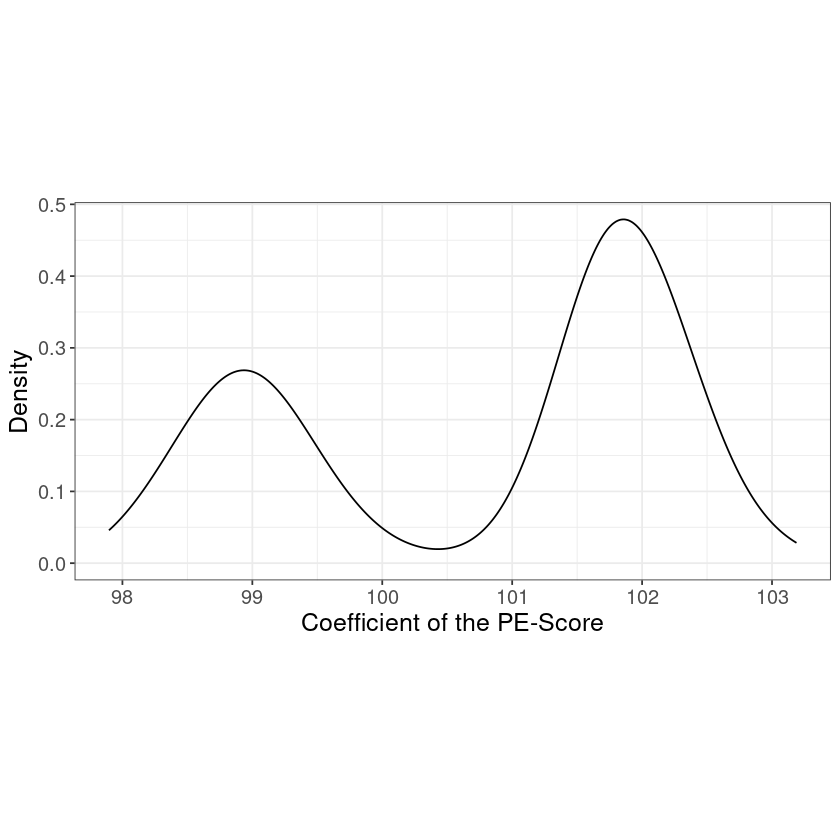

In [81]:
ggplot(data.frame(beta_bs = beta_bs), aes(beta_bs)) + 
  geom_density() + 
  scale_x_continuous(
    breaks=seq(98, 103 ,1)
  ) +
theme_bw() +
  xlab('Coefficient of the PE-Score') + 
  ylab('Density') + 
  theme(text = element_text(size=15)) +
theme(aspect.ratio=2/4)

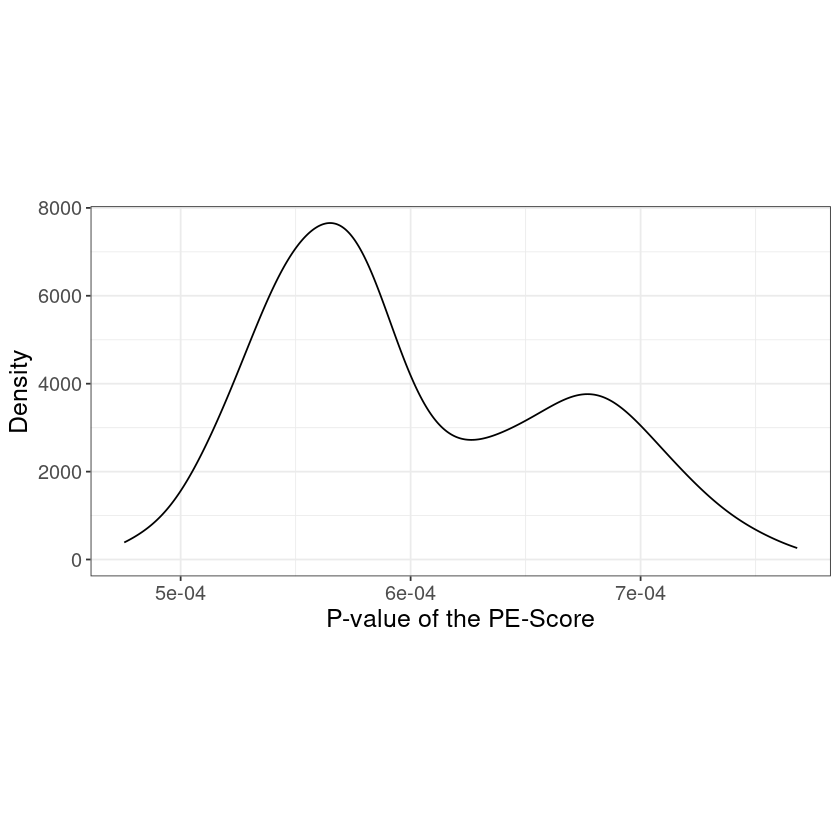

In [82]:
ggplot(data.frame(p_bs = p_bs), aes(p_bs)) + 
  geom_density() + 
theme_bw() +
  xlab('P-value of the PE-Score') + 
  ylab('Density') + 
  theme(text = element_text(size=15)) +
theme(aspect.ratio=2/4)

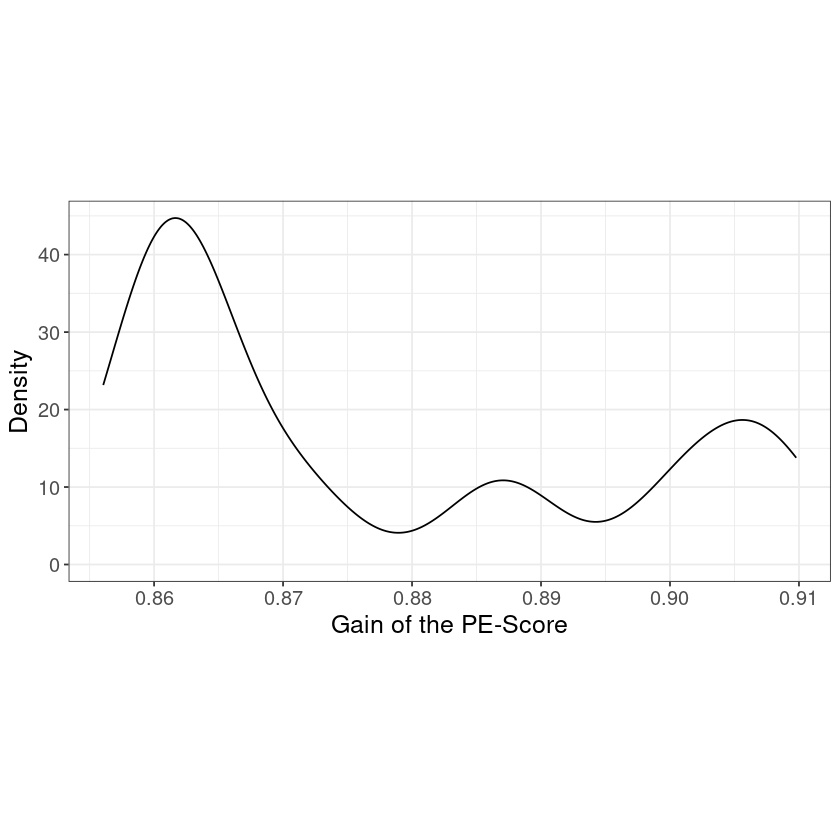

In [83]:
ggplot(data.frame(gain_bs = gain_bs), aes(gain_bs)) + 
  geom_density() + 

theme_bw() +

  xlab('Gain of the PE-Score') + 
  ylab('Density') + 
  theme(text = element_text(size=15)) +
theme(aspect.ratio=2/4)

#### Table H.7

In [84]:
m6_like = felm(tau ~ 
          + pe_score
             + p_score*like
             + avg_search 
               + price
               + discount
               + fans
               + avg_play
               + influencer_price
               + expected_cpm
               + order_cnt 
               + gender
             | category
                 , d %>% mutate(
                     like = like/1000000,
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m6_comment = felm(tau ~ 
          + pe_score
             + p_score*comment
             + avg_search 
               + price
               + discount
               + fans
               + avg_play
               + influencer_price
               + expected_cpm
               + order_cnt 
               + gender
             | category
                 , d %>% mutate(
                     comment = comment/1000000,
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m6_share = felm(tau ~ 
          + pe_score
             + p_score*share
             + avg_search 
               + price
               + discount
               + fans
               + avg_play
               + influencer_price
               + expected_cpm
               + order_cnt 
               + gender
             | category
                 , d %>% mutate(
                     share = share/1000000,
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

vars.order = c("pe_score", "like", "comment", "share", "p_score", "p_score:like", "p_score:comment", "p_score:share",
               "gender", "fans","avg_play","influencer_price","expected_cpm","order_cnt",
               "avg_search", "price", "discount", 
               "Constant")

stargazer(m6_like, m6_comment, m6_share,
          digits = 2,
          type = 'text',
          star.cutoffs = c(.05, .01, .001),
          order=paste0("^", vars.order , "$")
         )


                                     Dependent variable:      
                               -------------------------------
                                             tau              
                                  (1)       (2)        (3)    
--------------------------------------------------------------
pe_score                       100.62*** 100.98***  100.81*** 
                                (28.84)   (28.96)    (28.80)  
                                                              
like                             24.76                        
                                (72.52)                       
                                                              
comment                                    603.40             
                                         (3,199.10)           
                                                              
share                                                 732.34  
                                                     (

#### Table H.8

In [28]:
d = mutate(d, like_times_p_score = like * p_score,
              comment_times_p_score = comment * p_score,
              share_times_p_score = share * p_score)

In [29]:
set.seed(101)

x <- sparse.model.matrix(tau ~ ., data = select(d, tau,
                                                                                    pe_score,
                                                                                                            p_score,
                                                like, 
                                                comment, 
                                                share,
                                                like_times_p_score, 
                                                comment_times_p_score, 
                                                share_times_p_score,
                                                 fans, avg_play, influencer_price, expected_cpm, order_cnt,gender,
                                                    avg_search, price, discount, category,


                                                           ) %>% drop_na)[,-1]

xgb = xgboost(data = as.matrix(x), 
              label = d$tau[!is.na(d$tau)], nround = 2, verbose = 0)

xgb.importance(model = xgb) %>% top_n(10, Gain) %>% stargazer(summary=FALSE, rownames=FALSE, type = 'text')


Feature                Gain  Cover Frequency
--------------------------------------------
pe_score              0.876  0.338   0.242  
expected_cpm          0.043  0.009   0.061  
p_score               0.036  0.328   0.182  
discount              0.017  0.034   0.212  
comment               0.011  0.003   0.061  
avg_search            0.008  0.142   0.061  
share                 0.003  0.069   0.061  
comment_times_p_score 0.003  0.072   0.030  
like                  0.003  0.001   0.030  
price                 0.0002 0.002   0.030  
--------------------------------------------


#### Table H.9

In [87]:
d2 = mutate(d, p_score = (p_score/len - min(p_score/len))/(max(p_score/len) - min(p_score/len)),
           e_score = (e_score/len - min(e_score/len))/(max(e_score/len) - min(e_score/len)))

In [88]:
cor.test(d$pe_score, d$p_score)
cor.test(d2$pe_score, d2$p_score)


	Pearson's product-moment correlation

data:  d$pe_score and d$p_score
t = 10.253, df = 257, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4462079 0.6199666
sample estimates:
      cor 
0.5387929 



	Pearson's product-moment correlation

data:  d2$pe_score and d2$p_score
t = 26.254, df = 257, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8165240 0.8834551
sample estimates:
      cor 
0.8534709 


In [89]:
cor.test(d$pe_score, d$e_score)
cor.test(d2$pe_score, d2$e_score)


	Pearson's product-moment correlation

data:  d$pe_score and d$e_score
t = -0.29148, df = 257, p-value = 0.7709
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1397579  0.1039401
sample estimates:
        cor 
-0.01817894 



	Pearson's product-moment correlation

data:  d2$pe_score and d2$e_score
t = 1.6976, df = 257, p-value = 0.0908
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01680271  0.22431127
sample estimates:
      cor 
0.1053016 


In [90]:
m1 = felm(tau ~ 
               + pe_score 
                 , d2 %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m2 = felm(tau ~ 
          + e_score
                 , d2 %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m3 = felm(tau ~ 
               + p_score 
                 , d2 %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m4 = felm(tau ~ 
          + p_score*e_score -p_score -e_score
                 , d2 %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m5 = felm(tau ~ 
               + pe_score 
              + p_score*e_score
                 , d2 %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m6 = felm(tau ~ 
               + pe_score 
             + p_score*e_score
             + avg_search 
               + price
               + discount
               + fans
               + avg_play
               + influencer_price
               + expected_cpm
               + order_cnt 
               + gender
             | category
                 , d2 %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

vars.order = c("pe_score", "e_score", "p_score", "p_score:e_score", 
               "gender", "fans", "avg_play", "influencer_price", "expected_cpm", "order_cnt",
               "avg_search", "price", "discount", 
               "Constant")

stargazer(m1,m2,m3,m4,m5,m6,
          digits = 2,
          type = 'text',
          star.cutoffs = c(.05, .01, .001),
          omit = c("Constant"),
          order=paste0("^", vars.order , "$")
         )


                                                             Dependent variable:                                         
                    -----------------------------------------------------------------------------------------------------
                                                                     tau                                                 
                          (1)              (2)              (3)              (4)              (5)              (6)       
-------------------------------------------------------------------------------------------------------------------------
pe_score                68.27**                                                             138.23**         141.02**    
                        (22.87)                                                             (44.79)          (46.86)     
                                                                                                                         
e_score                

#### Table H.10

In [91]:
m1 = felm(tau ~ 
               + pe_score 
               + len
                 , d2 %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m2 = felm(tau ~ 
          + e_score
                         + len
                 , d2 %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m3 = felm(tau ~ 
               + p_score 
                         + len
                 , d2 %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m4 = felm(tau ~ 
          + p_score*e_score -p_score -e_score
                         + len
                 , d2 %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m5 = felm(tau ~ 
               + pe_score 
              + p_score*e_score
                         + len
                 , d2 %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m6 = felm(tau ~ 
               + pe_score 
             + p_score*e_score
             + avg_search 
               + price
               + discount
               + fans
               + avg_play
               + influencer_price
               + expected_cpm
               + order_cnt 
               + gender
               + len 
             | category
                 , d2 %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

vars.order = c("pe_score", "e_score", "p_score", "p_score:e_score", "len",
               "gender", "fans", "avg_play", "influencer_price", "expected_cpm", "order_cnt",
               "avg_search", "price", "discount", 
               "Constant")

stargazer(m1,m2,m3,m4,m5,m6,
          digits = 2,
          type = 'text',
          star.cutoffs = c(.05, .01, .001),
          omit = c("Constant"),
          order=paste0("^", vars.order , "$")
         )


                                                             Dependent variable:                                         
                    -----------------------------------------------------------------------------------------------------
                                                                     tau                                                 
                          (1)              (2)              (3)              (4)              (5)              (6)       
-------------------------------------------------------------------------------------------------------------------------
pe_score                65.85**                                                             141.34**         145.92**    
                        (23.00)                                                             (44.96)          (47.12)     
                                                                                                                         
e_score                

#### Table H.11

In [92]:
set.seed(101)

x <- sparse.model.matrix(tau ~ ., data = select(d2, tau,
                                                                                    pe_score,
                                                                                                            p_score, e_score, p_times_e_score, 
                                                 fans, avg_play, influencer_price, expected_cpm, order_cnt,gender,

                                                    avg_search, price, discount, category,


                                                           ) %>% drop_na)[,-1]

xgb = xgboost(data = as.matrix(x), 
              label = d2$tau[!is.na(d2$tau)], nround = 2, verbose = 0)

xgb.importance(model = xgb) %>% top_n(10, Gain) %>% stargazer(summary=FALSE, rownames=FALSE, type = 'text')


Feature      Gain  Cover Frequency
----------------------------------
pe_score     0.869 0.344   0.235  
expected_cpm 0.057 0.090   0.147  
e_score      0.040 0.400   0.353  
p_score      0.029 0.011   0.059  
fans         0.002 0.077   0.118  
avg_search   0.001 0.072   0.029  
discount     0.001 0.007   0.059  
----------------------------------


In [93]:
set.seed(101)

x <- sparse.model.matrix(tau ~ ., data = select(d2, tau,
                                                                                    pe_score,
                                                                                                            p_score, e_score, p_times_e_score, len,
                                                 fans, avg_play, influencer_price, expected_cpm, order_cnt,gender,

                                                    avg_search, price, discount, category,


                                                           ) %>% drop_na)[,-1]

xgb = xgboost(data = as.matrix(x), 
              label = d2$tau[!is.na(d2$tau)], nround = 2, verbose = 0)

xgb.importance(model = xgb) %>% top_n(10, Gain) %>% stargazer(summary=FALSE, rownames=FALSE, type = 'text')


Feature      Gain  Cover Frequency
----------------------------------
pe_score     0.869 0.344   0.235  
expected_cpm 0.057 0.090   0.147  
e_score      0.039 0.330   0.324  
p_score      0.029 0.011   0.059  
fans         0.002 0.077   0.118  
avg_search   0.001 0.072   0.029  
len          0.001 0.070   0.029  
discount     0.001 0.007   0.059  
----------------------------------
